**Arrest Prediction Using Machine Learning: Analyzing Chicago Crime**

Extracted data from the City of Chicago to develop a model for predicting arrests. Experimented with various machine learning algorithms to identify the most effective approach, aiming to improve accuracy and ensure balanced predictions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [ ]:
url = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$limit=5000000"
df = pd.read_csv(url)
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13739834,JJ138260,2025-02-04T00:00:00.000,047XX W MARQUETTE RD,0560,ASSAULT,SIMPLE,STREET,False,True,...,23.0,65.0,08A,1146112.0,1859760.0,2025,2025-02-11T15:42:38.000,41.771161,-87.739965,"\n, \n(41.7711605, -87.739964917)"
1,13739233,JJ137508,2025-02-04T00:00:00.000,015XX S CHRISTIANA AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE - YARD (FRONT / BACK),True,True,...,24.0,29.0,26,1154284.0,1892243.0,2025,2025-02-11T15:42:38.000,41.860140,-87.709144,"\n, \n(41.860139578, -87.709144009)"
2,13739560,JJ137742,2025-02-04T00:00:00.000,004XX E 63RD ST,0810,THEFT,OVER $500,RESTAURANT,False,False,...,20.0,42.0,06,1180086.0,1863329.0,2025,2025-02-11T15:42:38.000,41.780243,-87.615319,"\n, \n(41.780243493, -87.615319321)"
3,13742316,JJ141551,2025-02-04T00:00:00.000,016XX W TOUHY AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,49.0,1.0,14,1164316.0,1947916.0,2025,2025-02-11T15:42:38.000,42.012703,-87.670740,"\n, \n(42.012703334, -87.670739681)"
4,13739892,JJ138400,2025-02-04T00:00:00.000,027XX S WESTERN AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,12.0,31.0,08B,1160828.0,1885676.0,2025,2025-02-11T15:42:38.000,41.841986,-87.685305,"\n, \n(41.841985983, -87.685304565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,6015060,HN784512,2007-12-30T07:50:00.000,080XX S DREXEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,True,False,...,8.0,44.0,18,1183627.0,1851969.0,2007,2018-02-28T15:56:25.000,41.748989,-87.602691,"\n, \n(41.748988677, -87.602691353)"
4999996,5990097,HN784529,2007-12-30T07:45:10.000,024XX S SAWYER AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1155082.0,1887583.0,2007,2018-02-28T15:56:25.000,41.847336,-87.706340,"\n, \n(41.84733605, -87.706339649)"
4999997,5989553,HN784607,2007-12-30T07:44:24.000,049XX W WALTON ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,37.0,25.0,08A,1143257.0,1905859.0,2007,2021-09-07T15:41:02.000,41.897716,-87.749282,"\n, \n(41.897716421, -87.749281543)"
4999998,5993148,HN784522,2007-12-30T07:34:20.000,002XX N KILBOURN AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,False,True,...,28.0,26.0,26,1146343.0,1901172.0,2007,2021-09-07T15:41:02.000,41.884797,-87.738066,"\n, \n(41.88479656, -87.738066308)"


In [ ]:
print(df['description'].unique())



['SIMPLE' 'TO RESIDENCE' 'OVER $500' 'TO VEHICLE'
 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT' 'THEFT / RECOVERY - AUTOMOBILE'
 'TELEPHONE THREAT' 'UNLAWFUL ENTRY' 'COUNTERFEIT CHECK'
 'FRAUD OR CONFIDENCE GAME' 'TO LAND' '$500 AND UNDER'
 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY'
 'TO PROPERTY' 'ARMED - HANDGUN' 'FORCIBLE ENTRY'
 'DOMESTIC BATTERY SIMPLE' 'ARMED - KNIFE / CUTTING INSTRUMENT'
 'OTHER CRIME AGAINST PERSON' 'NON-AGGRAVATED'
 'ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT' 'CRIMINAL DEFACEMENT'
 'AUTOMOBILE' 'POSSESS - HALLUCINOGENS' 'POSSESS - HEROIN (WHITE)'
 'THEFT FROM MOTOR VEHICLE' 'BURGLARY FROM MOTOR VEHICLE'
 'AGGRAVATED - HANDGUN' 'UNLAWFUL POSSESSION - HANDGUN'
 'TIRE DEFLATION DEVICE DEPLOYMENT' 'FROM BUILDING'
 'FOUND SUSPECT NARCOTICS' 'POSSESS - HEROIN (TAN / BROWN TAR)'
 'RETAIL THEFT' 'ATTEMPT - AUTOMOBILE'
 'GUN OFFENDER - ANNUAL REGISTRATION'
 'MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS' 'RECKLESS CONDUCT'
 'STOLEN PROPERTY BUY / RECEI

In [ ]:
print(df['date'].min(), df['date'].max())

2007-12-30T07:30:00.000 2025-02-04T00:00:00.000


Filtering out data in between 2019 to 2024

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
df['date_only'] = df['date'].dt.date   # Extract only the date
df['time_only'] = df['date'].dt.time   # Extract only the time
# Display the first few rows
df[['date', 'date_only', 'time_only']].head()


,date,date_only,time_only
0,2025-02-04,2025-02-04,00:00:00
1,2025-02-04,2025-02-04,00:00:00
2,2025-02-04,2025-02-04,00:00:00
3,2025-02-04,2025-02-04,00:00:00
4,2025-02-04,2025-02-04,00:00:00


In [ ]:
# Create separate numerical time features
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek

In [ ]:
#df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date  # Remove time
data = df[(df['date_only'] >= pd.to_datetime('2019-01-01').date()) & (df['date_only'] <= pd.to_datetime('2024-12-31').date())]


In [ ]:
data.shape

(1443215, 29)

In [ ]:
columns_nullverify = ['date_only', 'primary_type', 'arrest', 'domestic']
null_values = data[columns_nullverify].isnull().sum()
print(null_values)


date_only       0
primary_type    0
arrest          0
domestic        0
dtype: int64


Exploratory Data Analysis (EDA)

1. Crime trends over time



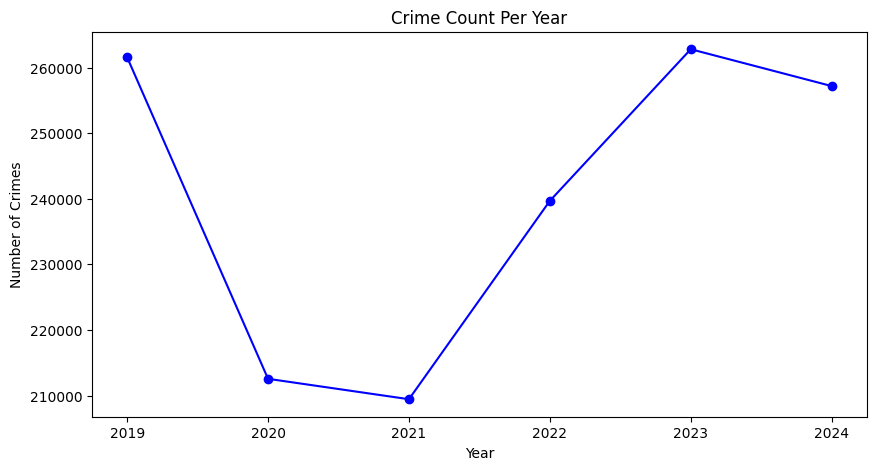

In [ ]:
data.groupby('year')['id'].count().plot(kind='line', marker='o', color='blue', figsize=(10, 5))
plt.title("Crime Count Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


From the above plot we can notice that there is a decline in crime from over 260,000 crimes in 2019 to around 210,000 in 2021. This drop could be attributed to factors like the COVID-19 pandemic or policy changes. However, crime rates surged again from 2021, peaking in 2023 before slightly decreasing in 2024.









2. Hourly Crime Rate Analysis

<ipython-input-11-ceabdf8b48b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['time_only'].apply(lambda x: x.hour if pd.notnull(x) else None)


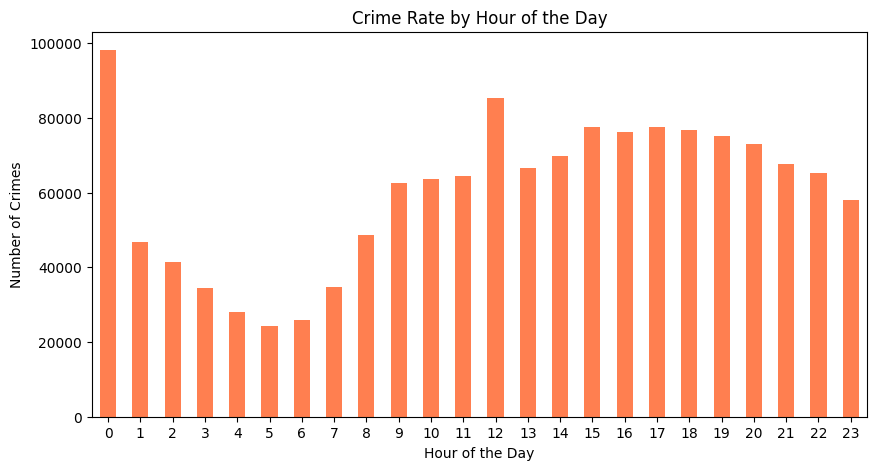

In [ ]:
import matplotlib.pyplot as plt
data['hour'] = data['time_only'].apply(lambda x: x.hour if pd.notnull(x) else None)
hourly_crime_rate = data.groupby('hour')['id'].count()
plt.figure(figsize=(10, 5))
hourly_crime_rate.plot(kind='bar', color='coral')
plt.title("Crime Rate by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()


From the above graph we can infer that the crime incidents peak around midnight and noon. Early morning hours experience the lowest crime rates, followed by a steady increase as the day progresses. The evening hours remain consistently high, suggesting increased criminal activity during that period, possibly due to higher public movement and social interactions.

3. Arrest Rate Over Time

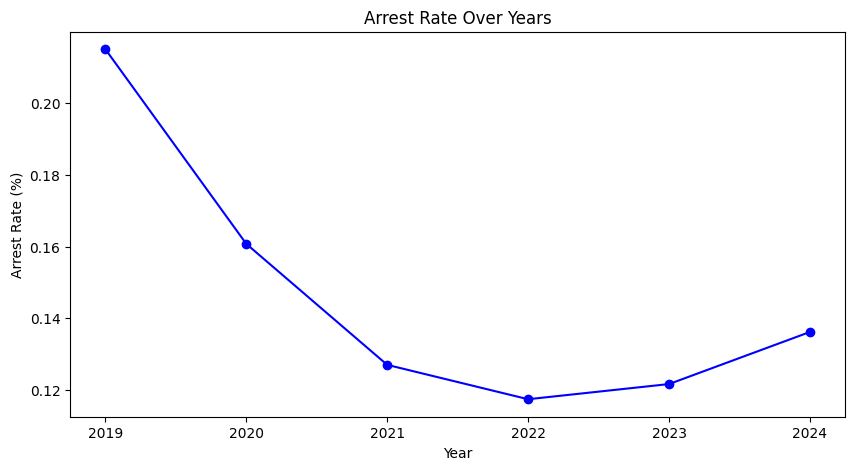

In [ ]:
import matplotlib.pyplot as plt
arrest_rate = data.groupby('year')['arrest'].mean()
arrest_rate.plot(kind='line', marker='o', color='blue', figsize=(10, 5))
plt.title("Arrest Rate Over Years")
plt.xlabel("Year")
plt.ylabel("Arrest Rate (%)")
plt.show()


The Arrest Rate Over Years significant declined from over 0.20% in 2019 to around 0.12% in 2022. However, from 2022 onwards, the arrest rate shows a slight upward trend, reaching approximately 0.14% in 2024.

4. Top 5 Crime Locations.

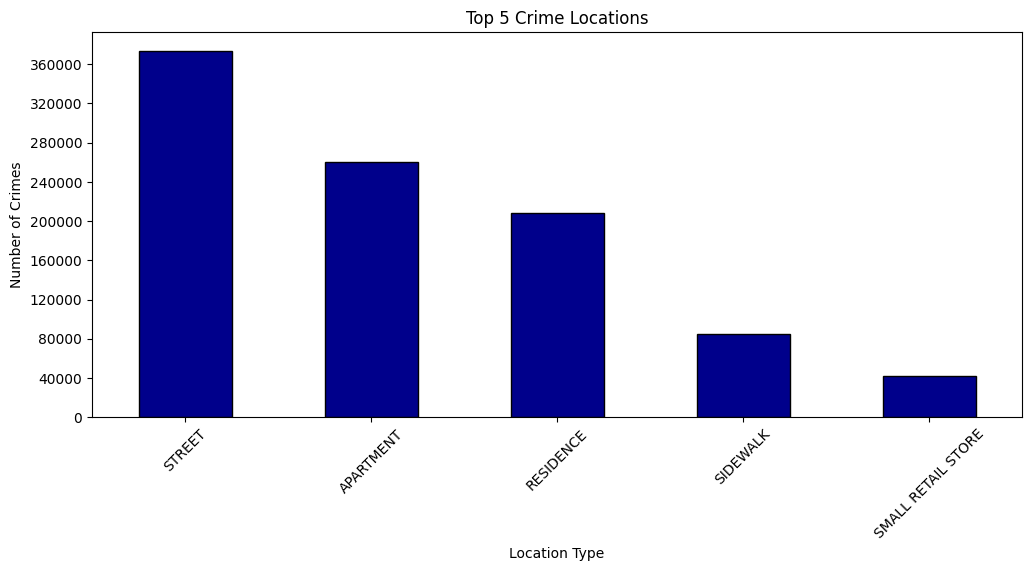

In [ ]:
plt.figure(figsize=(12, 5))
ax = data['location_description'].value_counts().head(5).plot(kind='bar', color='darkblue', edgecolor='black')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Forces integer ticks on y-axis
plt.title("Top 5 Crime Locations")
plt.xlabel("Location Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


The bar chart indicates that the highest number of crimes occurred on the streets.

5. Domestic vs. Non-Domestic Crimes



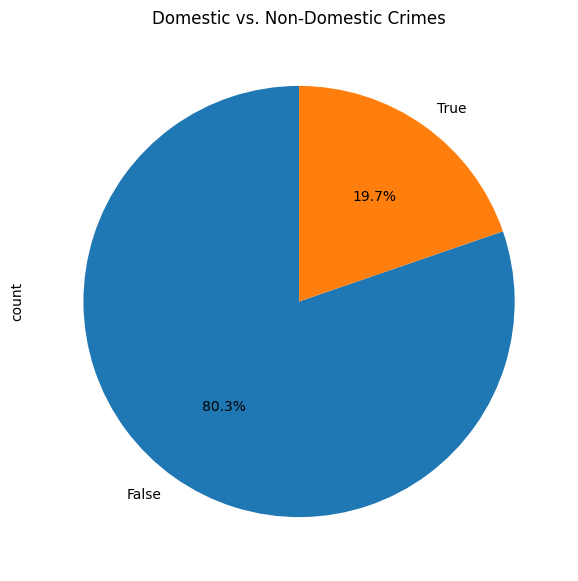

In [ ]:
plt.figure(figsize=(7, 7))
data['domestic'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Domestic vs. Non-Domestic Crimes")
plt.show()


Arrest Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Considering only top three locations - Streets , Apartment and Residence

In [ ]:
data = data[data['location_description'].str.contains('Street|Apartment|Residence', case=False, na=False)]

In [ ]:
data.shape

(897132, 29)

In [ ]:
columns_to_keep = ['primary_type', 'location_description', 'district', 'arrest', 'year', 'domestic', 'hour', 'month']
data = data[columns_to_keep]

categorical_cols = ['primary_type', 'location_description','arrest', 'year','domestic','month']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [ ]:
if 'arrest' in data.columns:
    data['arrest'] = data['arrest'].astype(bool)
if 'domestic' in data.columns:
    data['domestic'] = data['domestic'].astype(bool)

In [ ]:
# Check class distribution
class_distribution = data['arrest'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 arrest
False    787131
True     110001
Name: count, dtype: int64


The dataset exhibits an imbalance, with significantly more False cases (787,131) than True cases (110,001). To address this issue and ensure better model performance, the SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset by generating synthetic samples for the minority class. This helps improve the model’s ability to learn from both classes effectively.

In [ ]:
# Define features & target variable
X = data.drop(columns=['arrest'])
y = data['arrest']

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Print class distribution after undersampling
print("Class distribution after smote :\n", pd.Series(y_resampled).value_counts())

Class distribution after smote :
 arrest
False    787131
True     787131
Name: count, dtype: int64


In [ ]:
# Train-Test Split with balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
model_0 = LogisticRegression(max_iter=1000, random_state=42)
model_0.fit(X_train, y_train)
y_pred = model_0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"\nLogistic Regression Model:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Model:
Accuracy: 0.6016204387444299
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.60      0.60    157427
        True       0.60      0.60      0.60    157426

    accuracy                           0.60    314853
   macro avg       0.60      0.60      0.60    314853
weighted avg       0.60      0.60      0.60    314853

Confusion Matrix:
 [[94500 62927]
 [62504 94922]]


In [ ]:
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"\nRandom Forest Model:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Model:
Accuracy: 0.9079030531708449
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.89      0.91    157427
        True       0.90      0.92      0.91    157426

    accuracy                           0.91    314853
   macro avg       0.91      0.91      0.91    314853
weighted avg       0.91      0.91      0.91    314853

Confusion Matrix:
 [[140667  16760]
 [ 12237 145189]]


In [ ]:
model_2 = XGBClassifier(eval_metric='logloss', random_state=42)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"\n XG-Boost Model:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 XG-Boost Model:
Accuracy: 0.8403540699945689
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84    157427
        True       0.85      0.83      0.84    157426

    accuracy                           0.84    314853
   macro avg       0.84      0.84      0.84    314853
weighted avg       0.84      0.84      0.84    314853

Confusion Matrix:
 [[133901  23526]
 [ 26739 130687]]


In [ ]:
model_3 = LGBMClassifier(random_state=42)
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


[LightGBM] [Info] Number of positive: 629705, number of negative: 629704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 1259409, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000002
[LightGBM] [Info] Start training from score 0.000002


In [ ]:
print(f"\n LightGBM Model:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 LightGBM Model:
Accuracy: 0.8450229154557841
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.86      0.85    157427
        True       0.85      0.83      0.84    157426

    accuracy                           0.85    314853
   macro avg       0.85      0.85      0.84    314853
weighted avg       0.85      0.85      0.84    314853

Confusion Matrix:
 [[135075  22352]
 [ 26443 130983]]


In [ ]:
model_4 = DecisionTreeClassifier(random_state=42)
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [ ]:
print(f"\n Decision Tree Model:")
print(" Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Decision Tree Model:
 Accuracy: 0.8963960959558905
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.88      0.89    157427
        True       0.88      0.92      0.90    157426

    accuracy                           0.90    314853
   macro avg       0.90      0.90      0.90    314853
weighted avg       0.90      0.90      0.90    314853

Confusion Matrix:
 [[138145  19282]
 [ 13338 144088]]


Best Model

In [ ]:
best_model = model_1
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("\nBest Model: Random Forest")
print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Best Model: Random Forest
Accuracy: 0.9079030531708449
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.89      0.91    157427
        True       0.90      0.92      0.91    157426

    accuracy                           0.91    314853
   macro avg       0.91      0.91      0.91    314853
weighted avg       0.91      0.91      0.91    314853

Confusion Matrix:
 [[140667  16760]
 [ 12237 145189]]


After testing multiple models, Random Forest emerged as the best-performing model, achieving an accuracy of 90.79%. The model was evaluated using precision, recall, F1-score, and a confusion matrix to ensure reliable predictions.